In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('credit-card-default.csv')
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [5]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [9]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

#As per data dictionary there are 5 categories 1 to 5 for Education column and 5 and 6 are both showing as 'UNKNOWN'. There is no **0** category in the dictionary but present in dataset.                               
#- Hence Combining `0, 5, and 6` together as **'UNKNOWN'** category. Changing all `6 and 0` to `5`.

In [7]:
df['EDUCATION'].replace([0, 6], 5, inplace=True)


In [8]:
df.EDUCATION.value_counts()


2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [10]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

#As per data dictionary there are 3 categories 1 to 3 for Marriage column but **0** category present in dataset.                              
#Hence Combining `0` as **'Others'** category. Changing all `0` to `3`.


In [11]:
df['MARRIAGE'].replace(0, 3, inplace=True)

In [13]:
df.MARRIAGE.value_counts()


2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [14]:
df.PAY_2.value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [15]:
df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

#In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.


In [16]:
# Dropping id column as it's no use
df.drop('ID',axis=1, inplace=True)


In [17]:
# Putting feature variable to X
X = df.drop('defaulted',axis=1)

In [18]:
# Putting response variable to y
y = df['defaulted']

In [19]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


### Hyperparameters
#Let's first fit a random forest model with default hyperparameters.


In [20]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [21]:
# fit
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [22]:
# Making predictions
predictions = rfc.predict(X_test)

In [23]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7058
           1       0.65      0.37      0.47      1942

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [24]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))


[[6670  388]
 [1228  714]]


In [25]:
print(accuracy_score(y_test,predictions))


0.8204444444444444


### So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

### Hyperparameter Tuning

__Tuning max_depth__

#Let's try to find the optimum values for ```max_depth``` and understand how the value of 
max_depth impacts the overall accuracy of the ensemble.

In [26]:
# specify number of folds for k-fold CV
n_folds = 5

In [27]:
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}


In [28]:
# instantiate the model
rf = RandomForestClassifier()


In [29]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [30]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.869854,0.014788,0.028887,0.001303,2,{'max_depth': 2},0.799524,0.798571,0.800952,0.795714,...,0.798571,0.001730,4,0.799107,0.796012,0.799940,0.801607,0.800714,0.799476,0.001920
1,2.442713,0.033634,0.034899,0.005527,7,{'max_depth': 7},0.813333,0.821190,0.815952,0.815000,...,0.816952,0.002875,1,0.831190,0.832202,0.831548,0.834405,0.831190,0.832107,0.001207
2,3.872918,0.064774,0.055841,0.008055,12,{'max_depth': 12},0.815952,0.817381,0.819286,0.812619,...,0.816571,0.002242,2,0.882262,0.883690,0.881905,0.885119,0.883214,0.883238,0.001138
3,4.894963,0.039368,0.072157,0.010238,17,{'max_depth': 17},0.814524,0.816905,0.819286,0.812857,...,0.815429,0.002364,3,0.927679,0.929048,0.928988,0.929464,0.928095,0.928655,0.000661


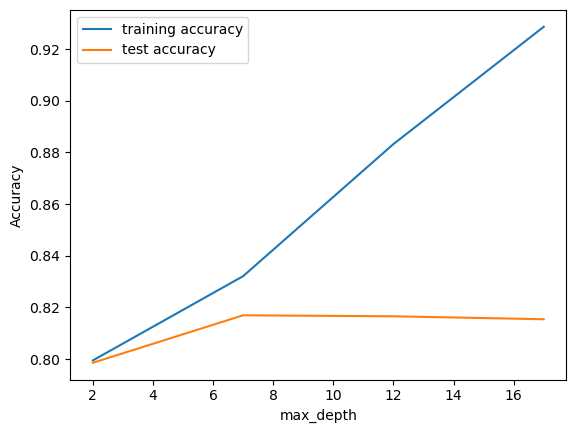

In [31]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

_You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth._

_Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest._

### Tuning n_estimators

___Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.___

In [32]:
# specify number of folds for k-fold CV
n_folds = 5

In [33]:
# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

In [34]:
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


In [35]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [36]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.530309,0.054548,0.032206,0.001073,100,{'n_estimators': 100},0.811667,0.812857,0.810952,0.807381,...,0.810048,0.002261,2,0.811607,0.810417,0.811190,0.815060,0.812440,0.812143,0.001598
1,7.570324,0.213897,0.143092,0.006093,500,{'n_estimators': 500},0.811429,0.815000,0.810952,0.805238,...,0.810048,0.003355,2,0.810774,0.810476,0.812917,0.812798,0.812202,0.811833,0.001020
2,13.746900,0.143984,0.271343,0.004821,900,{'n_estimators': 900},0.813095,0.813810,0.811190,0.804762,...,0.810095,0.003423,1,0.811369,0.809940,0.811964,0.812381,0.811964,0.811524,0.000855
3,20.068483,0.184989,0.399007,0.022364,1300,{'n_estimators': 1300},0.811429,0.813810,0.811429,0.805238,...,0.810000,0.002997,4,0.811190,0.810119,0.812798,0.813036,0.812798,0.811988,0.001143


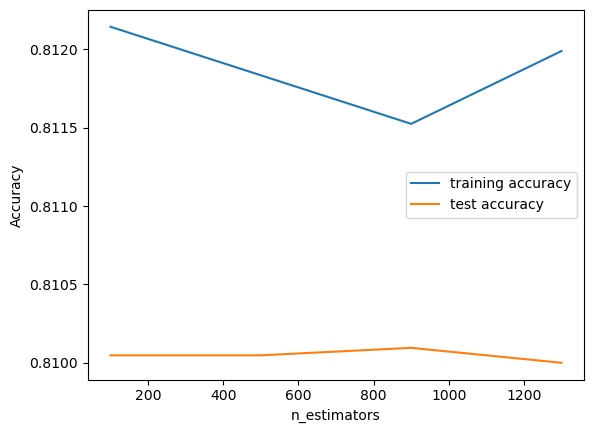

In [37]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



### Tuning max_features

__Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.__


In [51]:
# specify number of folds for k-fold CV
n_folds = 5

In [52]:
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

In [53]:
# instantiate the model
rf = RandomForestClassifier(max_depth=4)


In [54]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [55]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.495450,0.131098,0.030817,0.007721,4,{'max_features': 4},0.812381,0.813571,0.810000,0.808333,...,0.810667,0.001994,5,0.810357,0.810417,0.812143,0.813869,0.813512,0.812060,0.001482
1,2.784784,0.040662,0.031272,0.000814,8,{'max_features': 8},0.817619,0.820714,0.820714,0.817143,...,0.818905,0.001525,3,0.821190,0.820000,0.821667,0.821964,0.821429,0.821250,0.000676
2,4.552898,0.066712,0.029396,0.006948,14,{'max_features': 14},0.818095,0.821190,0.819524,0.817619,...,0.818810,0.001380,4,0.822500,0.821012,0.821310,0.823155,0.822440,0.822083,0.000799
3,6.320350,0.070779,0.024457,0.006371,20,{'max_features': 20},0.817619,0.822381,0.819286,0.817857,...,0.819095,0.001739,2,0.823095,0.820833,0.821786,0.823095,0.823452,0.822452,0.000989
4,7.277383,0.058026,0.030616,0.001003,24,{'max_features': 24},0.817619,0.822381,0.819048,0.818571,...,0.819143,0.001688,1,0.822857,0.821964,0.821845,0.822500,0.823750,0.822583,0.000689


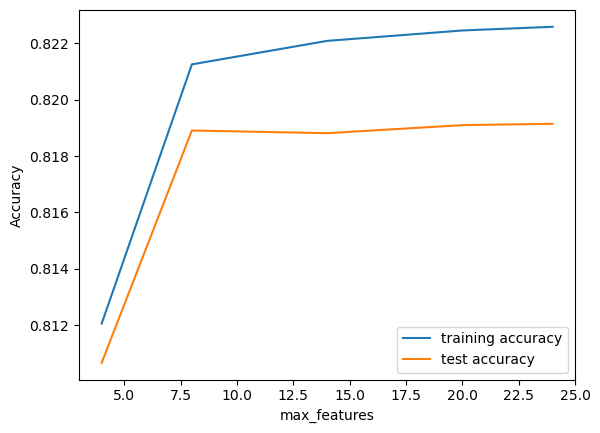

In [56]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


__Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.__


### Tuning min_samples_leaf

In [57]:
# specify number of folds for k-fold CV
n_folds = 5

In [58]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

In [59]:
# instantiate the model
rf = RandomForestClassifier()


In [60]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [61]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.651024,0.088589,0.047502,0.001482,100,{'min_samples_leaf': 100},0.813571,0.817619,0.812143,0.811667,...,0.813429,0.002190,1,0.817857,0.815298,0.813750,0.818512,0.818631,0.816810,0.001947
1,2.461548,0.098184,0.041260,0.007251,150,{'min_samples_leaf': 150},0.812143,0.812381,0.811667,0.810238,...,0.811048,0.001343,2,0.811964,0.810893,0.813393,0.816667,0.813750,0.813333,0.001955
2,2.227017,0.066112,0.044388,0.006615,200,{'min_samples_leaf': 200},0.810476,0.813333,0.810714,0.809524,...,0.810286,0.001925,3,0.809643,0.810476,0.808988,0.816964,0.810119,0.811238,0.002906
3,2.044653,0.054901,0.044055,0.006434,250,{'min_samples_leaf': 250},0.807619,0.811905,0.807857,0.803810,...,0.807238,0.002795,4,0.808333,0.808571,0.807321,0.811131,0.809881,0.809048,0.001323
4,2.000978,0.028828,0.043968,0.006378,300,{'min_samples_leaf': 300},0.808095,0.811190,0.805952,0.805476,...,0.807190,0.002241,5,0.806607,0.808690,0.807679,0.811190,0.809107,0.808655,0.001535


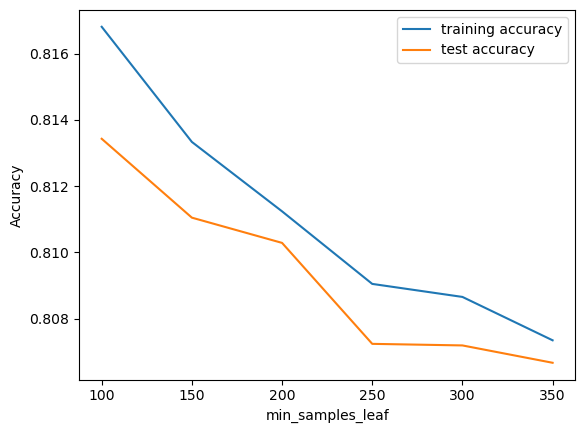

In [62]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


__You can see that the model starts of overfit as you decrease the value of min_samples_leaf.__

### Tuning min_samples_split

In [63]:
# specify number of folds for k-fold CV
n_folds = 5

In [64]:
# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}


In [65]:
# instantiate the model
rf = RandomForestClassifier()


In [66]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [67]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.877294,0.066826,0.053152,0.005546,200,{'min_samples_split': 200},0.818571,0.823095,0.820714,0.818333,...,0.819905,0.001805,1,0.824345,0.822560,0.824464,0.823988,0.824345,0.823940,0.000709
1,3.786402,0.047253,0.051364,0.006302,250,{'min_samples_split': 250},0.818810,0.821429,0.821190,0.816905,...,0.819190,0.001836,2,0.822798,0.822024,0.822679,0.822738,0.823333,0.822714,0.000417
2,3.712781,0.068358,0.049760,0.005980,300,{'min_samples_split': 300},0.818571,0.821905,0.821429,0.815714,...,0.818810,0.002520,4,0.822143,0.821369,0.821786,0.821607,0.822500,0.821881,0.000399
3,3.562685,0.150469,0.053585,0.007029,350,{'min_samples_split': 350},0.817381,0.820476,0.820952,0.815476,...,0.818190,0.002154,6,0.821071,0.820357,0.820833,0.820714,0.820417,0.820679,0.000265
4,3.430797,0.100588,0.044248,0.005914,400,{'min_samples_split': 400},0.817619,0.820476,0.821190,0.815476,...,0.818476,0.002090,5,0.821071,0.819226,0.819107,0.820417,0.820595,0.820083,0.000779


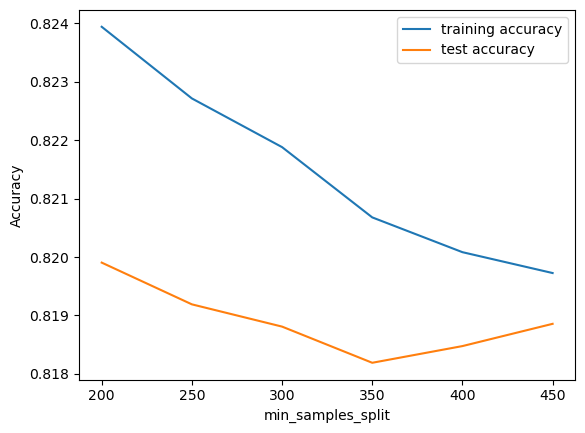

In [68]:
#plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [69]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

In [70]:
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)


In [71]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [72]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)


We can get accuracy of 0.8183809523809523 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 300, 'min_samples_split': 200, 'n_estimators': 200}


In [73]:
type(grid_search.best_params_)


dict

#**Fitting the final model with the best parameters obtained from grid search.**


In [74]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)


In [75]:
# fit
rfc.fit(X_train,y_train)


RandomForestClassifier(max_depth=4, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300)

In [76]:
# predict
predictions = rfc.predict(X_test)


In [77]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.35      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [78]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))


[[6753  305]
 [1258  684]]


In [79]:
print(accuracy_score(y_test,predictions))


0.8263333333333334
